# Import Libraries And Data

In [305]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   --- ------------------------------------ 41.0/456.1 kB ? eta -:--:--
   --------- ------------------------------ 112.6/456.1 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 184.3/456.1 kB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 266.2/456.1 kB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 348.2/456.1 kB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 430.1/456.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 456.1/

In [242]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 435.7 kB/s eta 0:03:53
   ---------------------------------------- 0.1/101.1 MB 544.7 kB/s eta 0:03:06
   ---------------------------------------- 0.1/101.1 MB 944.1 kB/s eta 0:01:47
   ---------------------------------------- 0.2/101.1 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.4/10

In [388]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import shap

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, roc_curve, confusion_matrix 

import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df = pd.read_csv('case.csv')
df

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

# Check For Duplicates And Missing Data

In [357]:
df.duplicated().sum()

0

In [358]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
customerID,0,0.0
Device_Protection,0,0.0
Total_Charges,0,0.0
Monthly_Charges,0,0.0
Payment_Method,0,0.0
Paperless_Billing,0,0.0
Contract,0,0.0
Streaming_Movies,0,0.0
Streaming_TV,0,0.0
Tech_Support,0,0.0


# Drop Irrelevant Columns

In [359]:
df = df.drop('customerID',axis=1)

In [360]:
df

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Types Matching

In [361]:
df['Senior_Citizen '] = df['Senior_Citizen '].apply(lambda x: 'Yes' if x == 1 else 'No')

In [362]:
df['tenure']= df['tenure'].astype(float)

In [151]:
df['Total_Charges']= df['Total_Charges'].astype(float)

ValueError: could not convert string to float: ' '

In [363]:
df['Total_Charges']= df['Total_Charges'].apply(lambda x : x if x!= ' ' else np.nan).astype(float)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Is_Married         7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   float64
 5   Phone_Service      7043 non-null   object 
 6   Dual               7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [365]:
missing(df)

,Missing_Number,Missing_Percent
Total_Charges,11,0.001564
gender,0,0.000000
Senior_Citizen,0,0.000000
Monthly_Charges,0,0.000000
Payment_Method,0,0.000000
Paperless_Billing,0,0.000000
Contract,0,0.000000
Streaming_Movies,0,0.000000
Streaming_TV,0,0.000000
Tech_Support,0,0.000000


# EDA

In [367]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

* Univariant Analysis

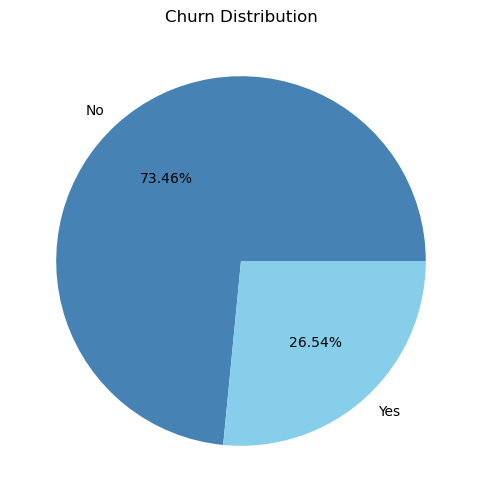

In [368]:
# Counting the occurrences of each value in the 'churn' column
churn_counts = df['Churn'].value_counts()

# Plotting the pie chart with Matplotlib
plt.figure(figsize=(8, 6))
colors=['steelblue','skyblue']
plt.pie(churn_counts, labels=churn_counts.index,
        autopct='%1.2f%%', colors=colors)
plt.title('Churn Distribution')
plt.show()


We have imbalanced data.

almost 26.54% of the customers left for another company.

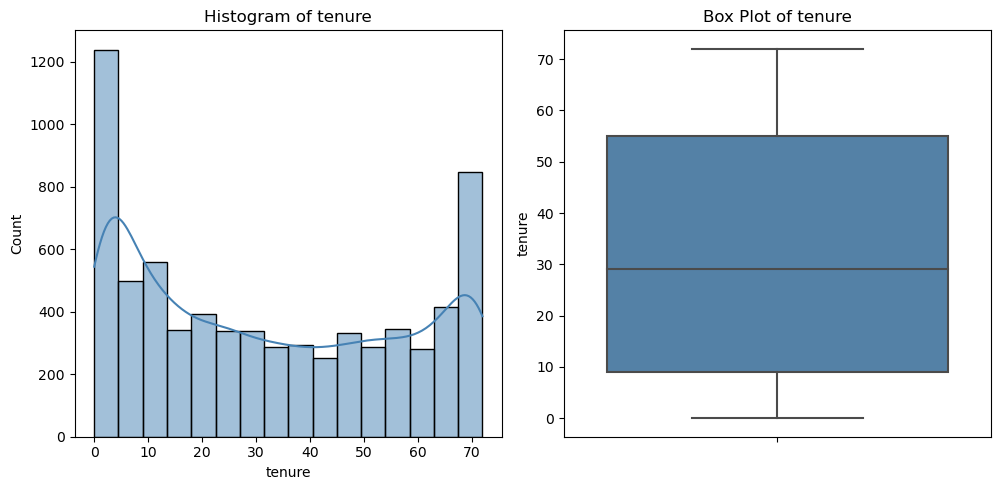

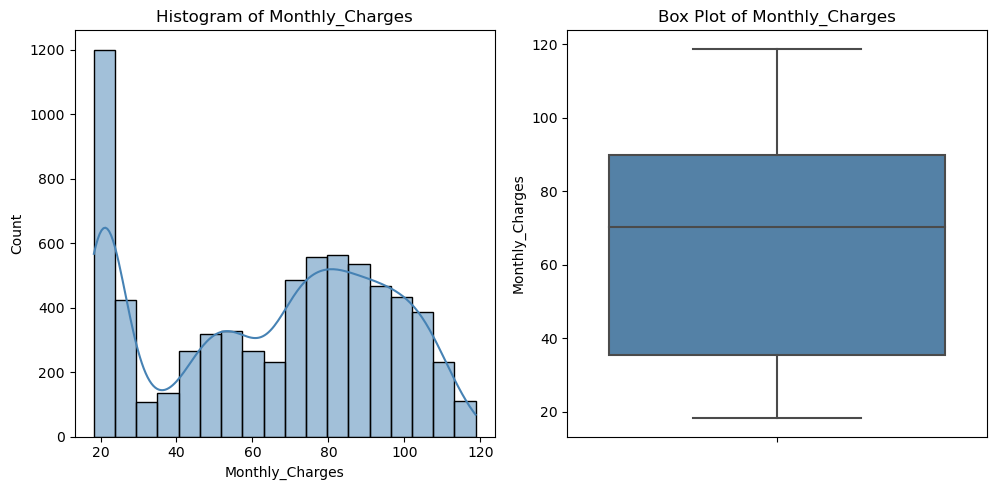

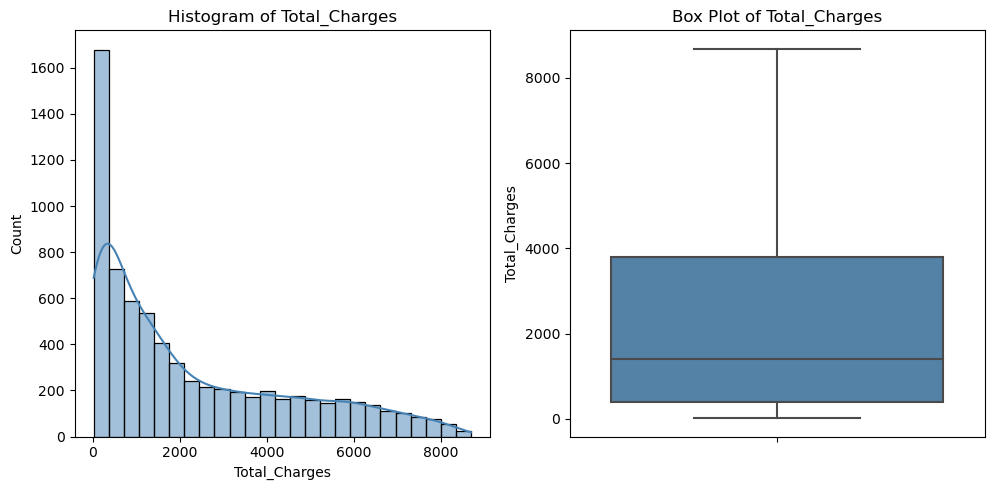

In [369]:
def plot_column_distributions(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        
        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=True, color='steelblue')
        plt.title(f'Histogram of {column}')
        
        # Box Plot
        plt.subplot(1, 3, 2)
        sns.boxplot(y=df[column], color='steelblue')
        plt.title(f'Box Plot of {column}')
        
        # Adjust layout and show plots
        plt.tight_layout()
        plt.show()


plot_column_distributions(df, numerical)


In [370]:
for feature in df[categorical]:
        print(f'{feature}: {df[feature].unique()}')

gender: ['Female' 'Male']
Senior_Citizen : ['No' 'Yes']
Is_Married: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone_Service: ['No' 'Yes']
Dual: ['No phone service' 'No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'Yes' 'No internet service']
Online_Backup: ['Yes' 'No' 'No internet service']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['No' 'Yes' 'No internet service']
Streaming_TV: ['No' 'Yes' 'No internet service']
Streaming_Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


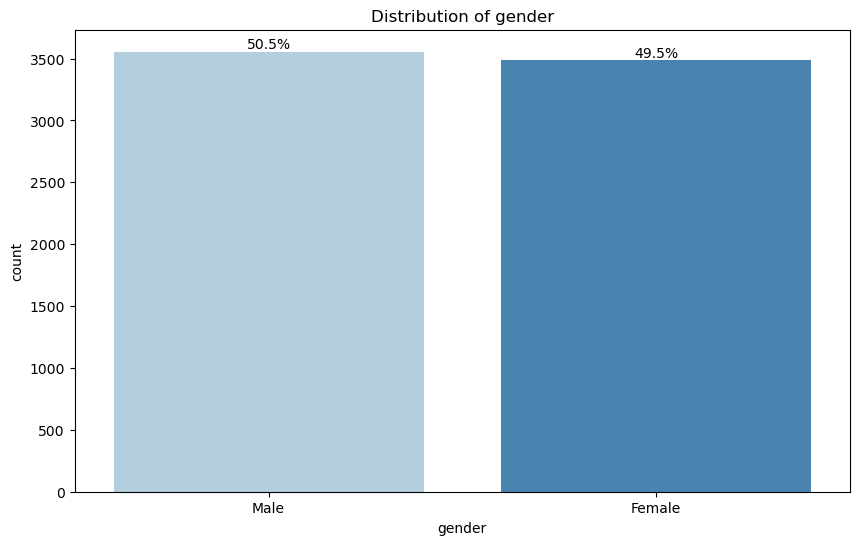

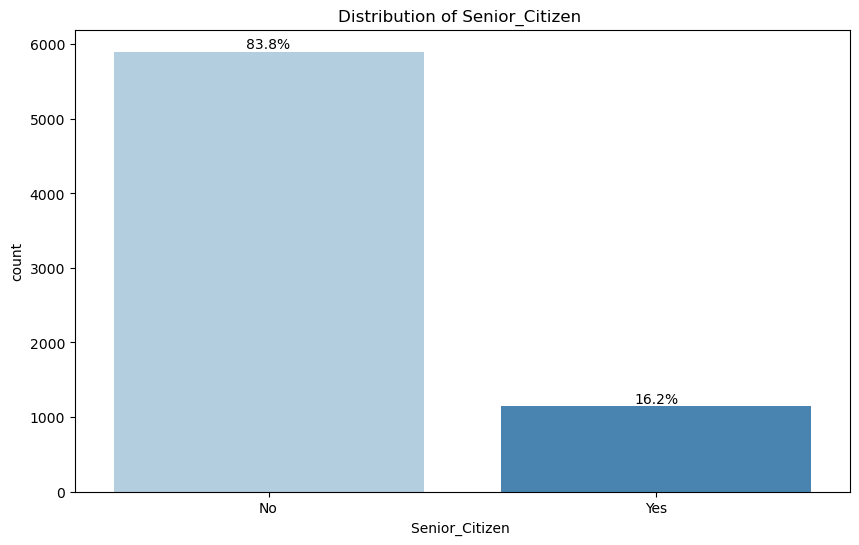

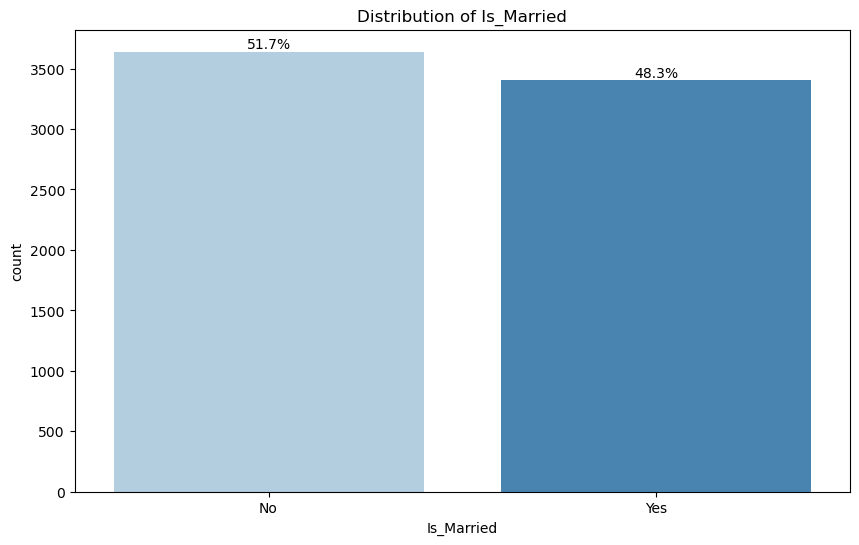

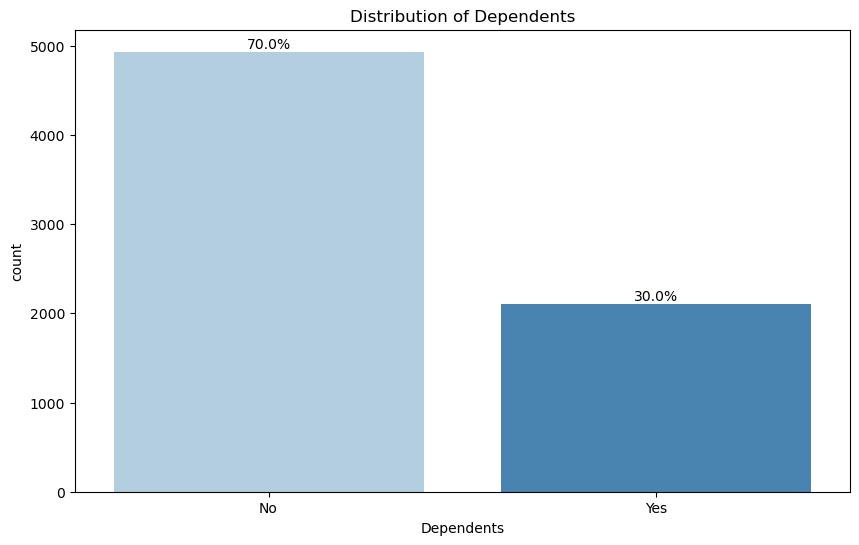

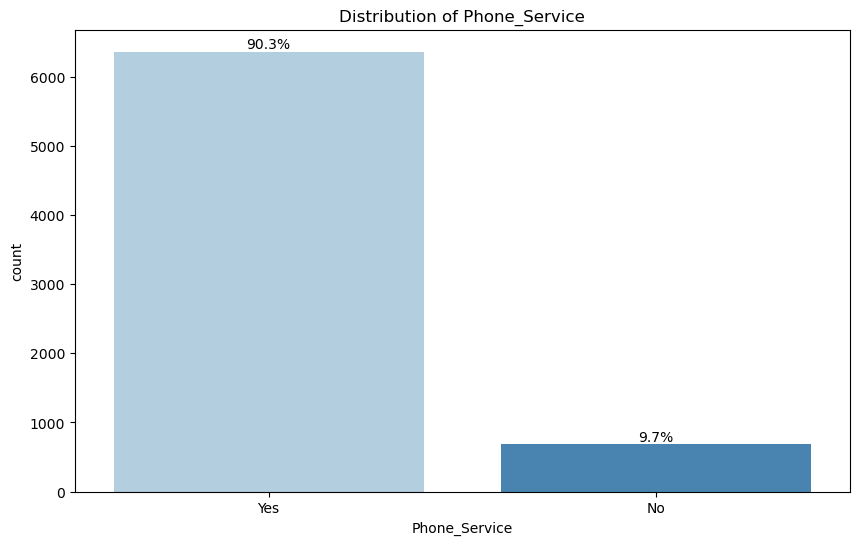

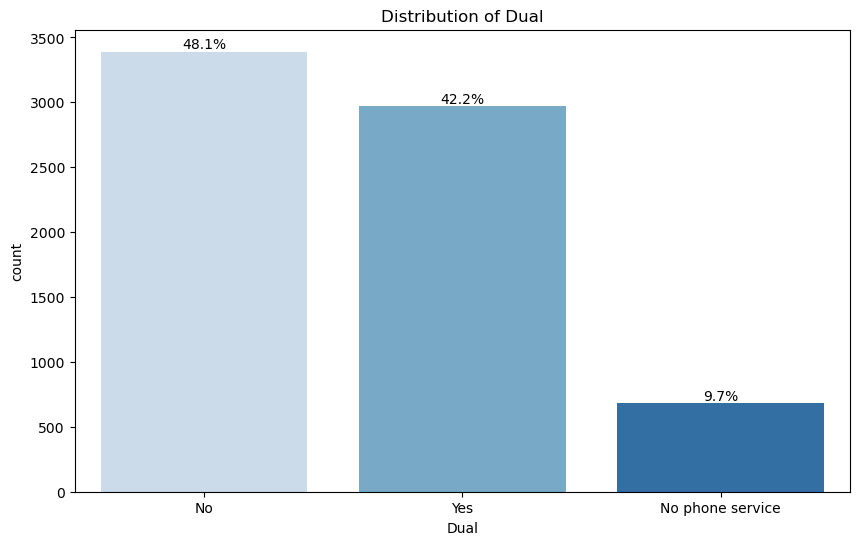

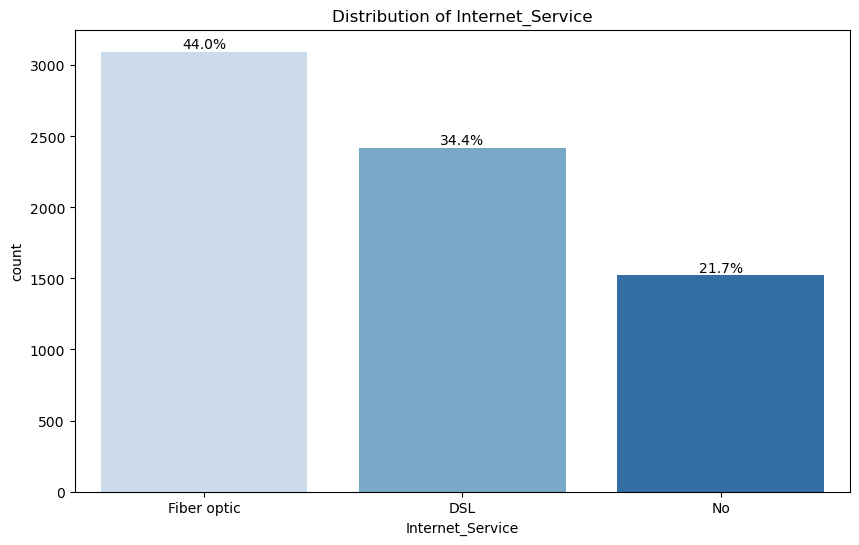

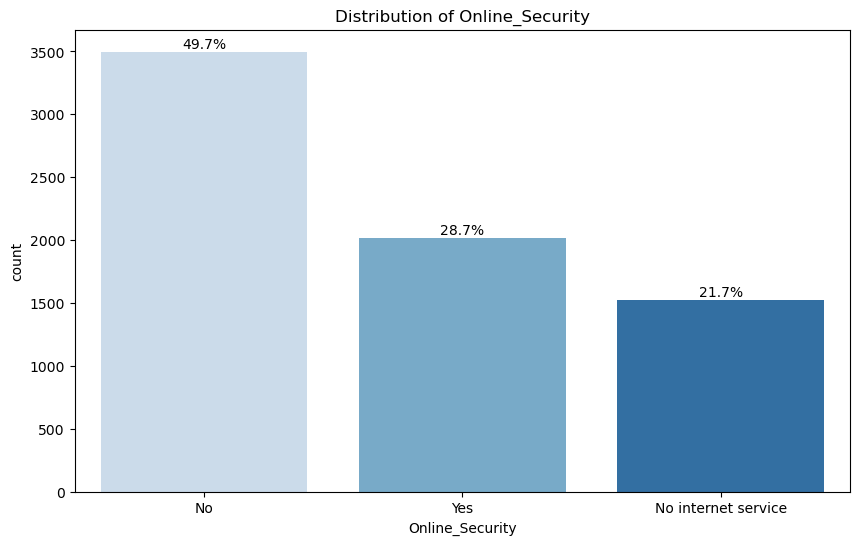

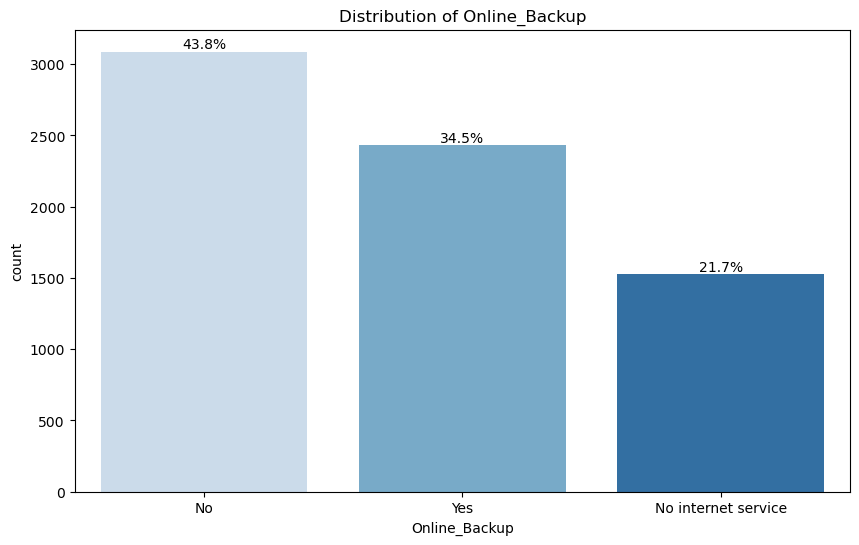

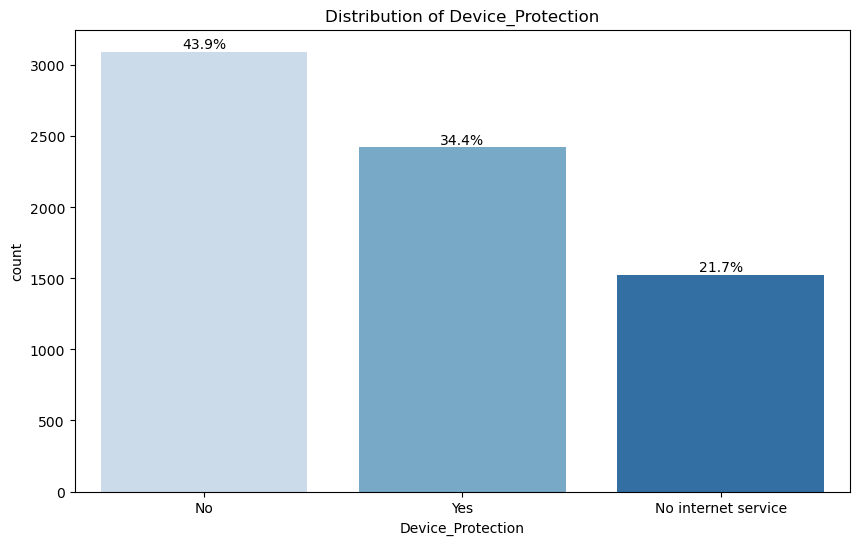

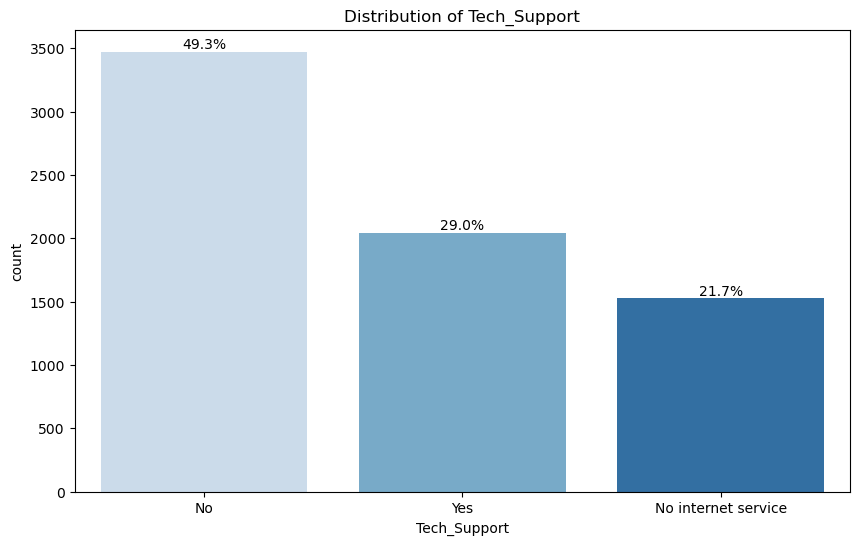

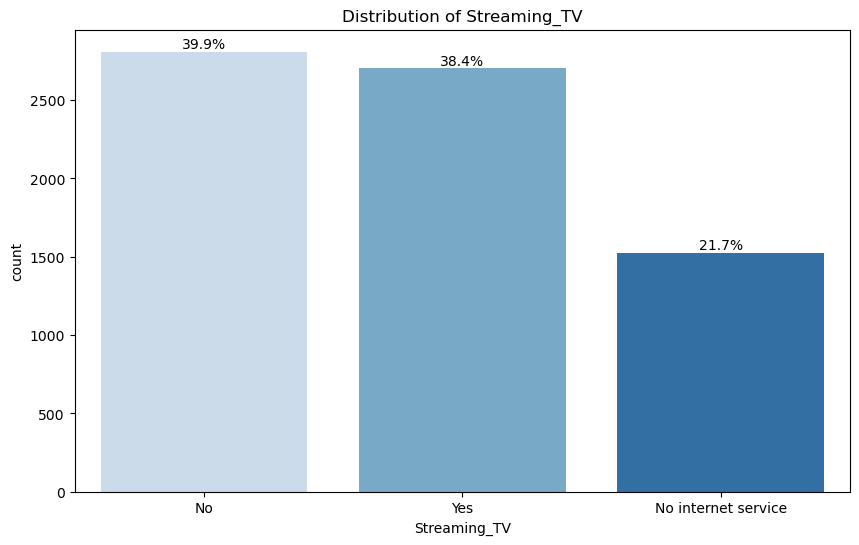

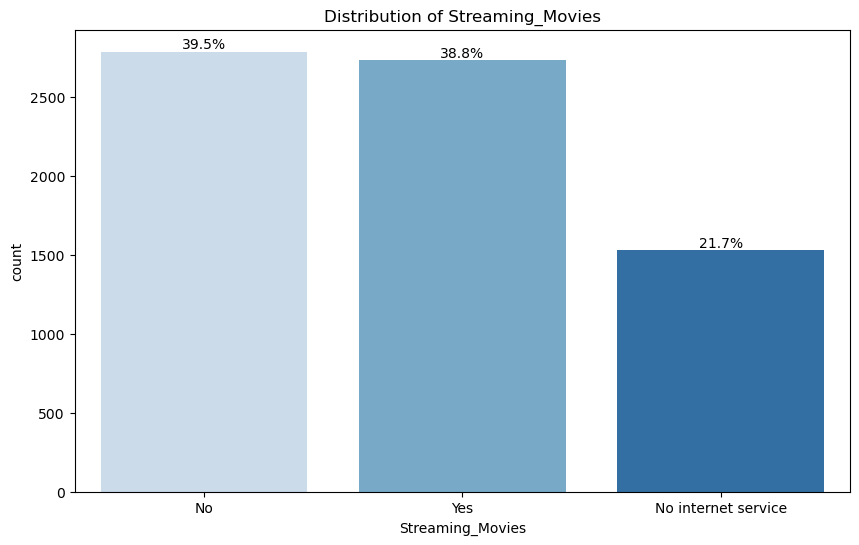

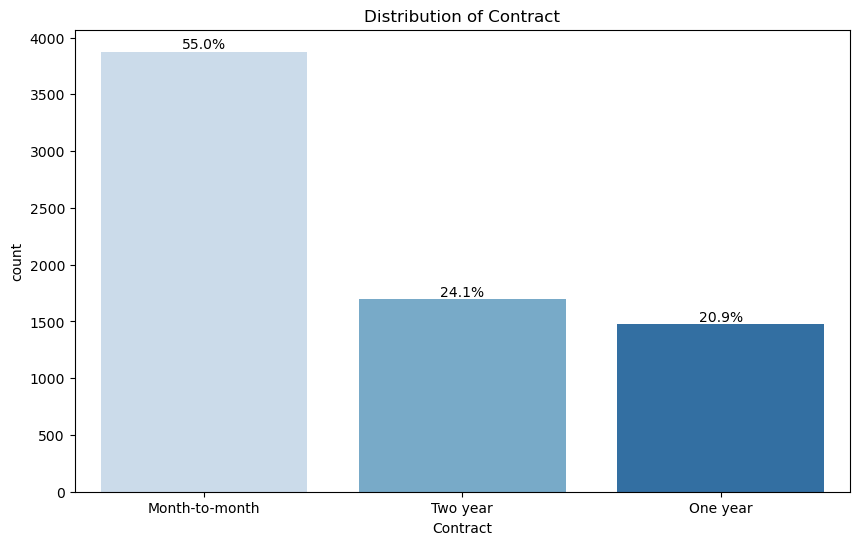

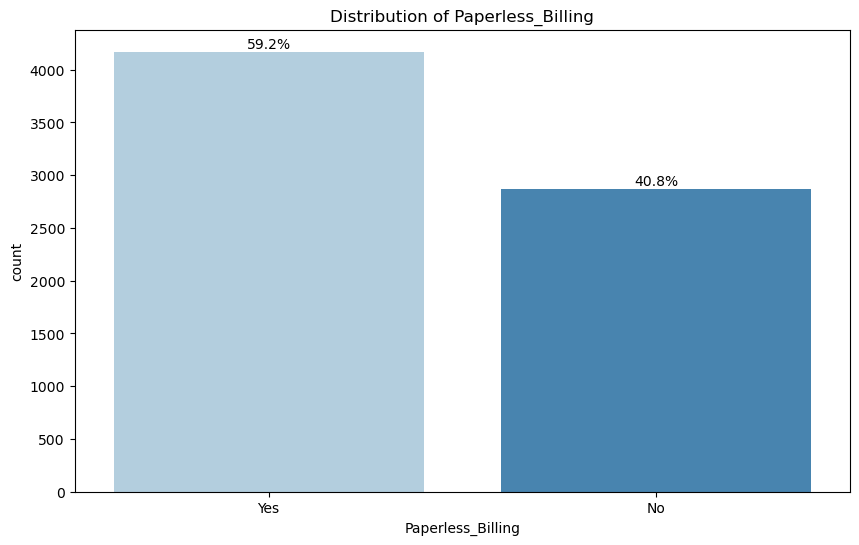

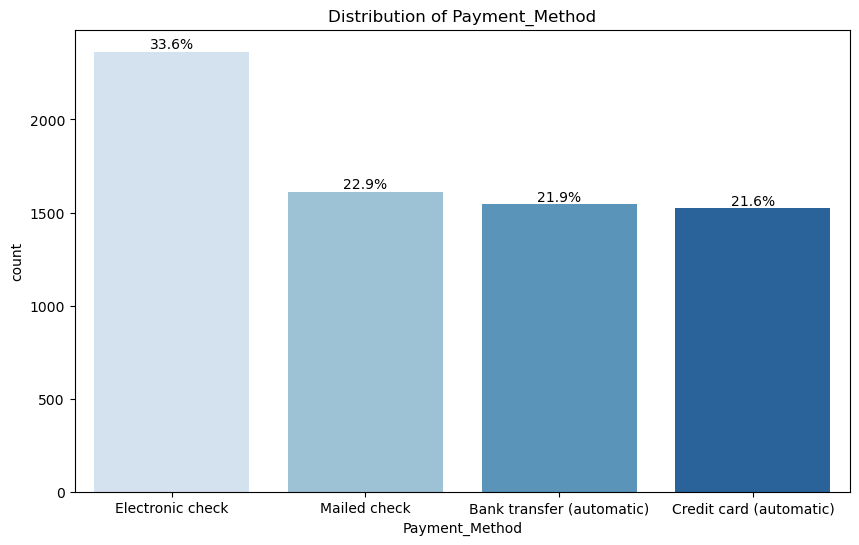

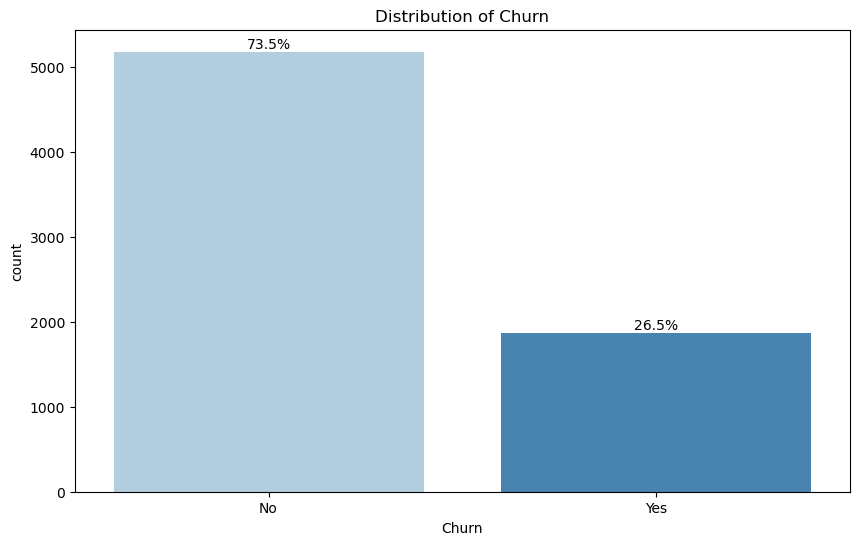

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_features(df, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        # Countplot with the blues palette
        ax = sns.countplot(data=df, x=feature, palette='Blues', order=df[feature].value_counts().index)
        
        # Calculate and annotate percentages
        total = len(df)
        for p in ax.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points')
        
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=0)
        plt.show()

plot_categorical_features(df, categorical)


* Bivariant Analysis

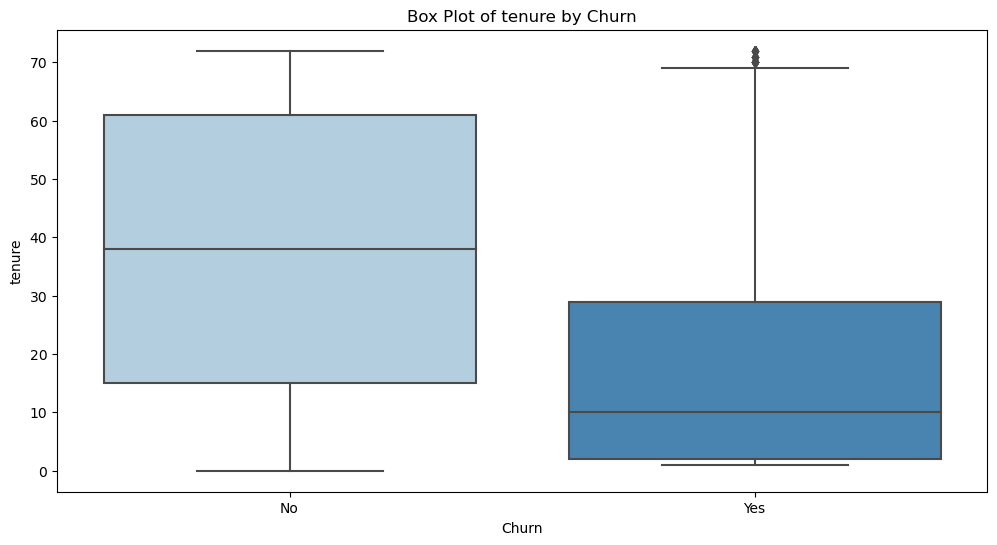

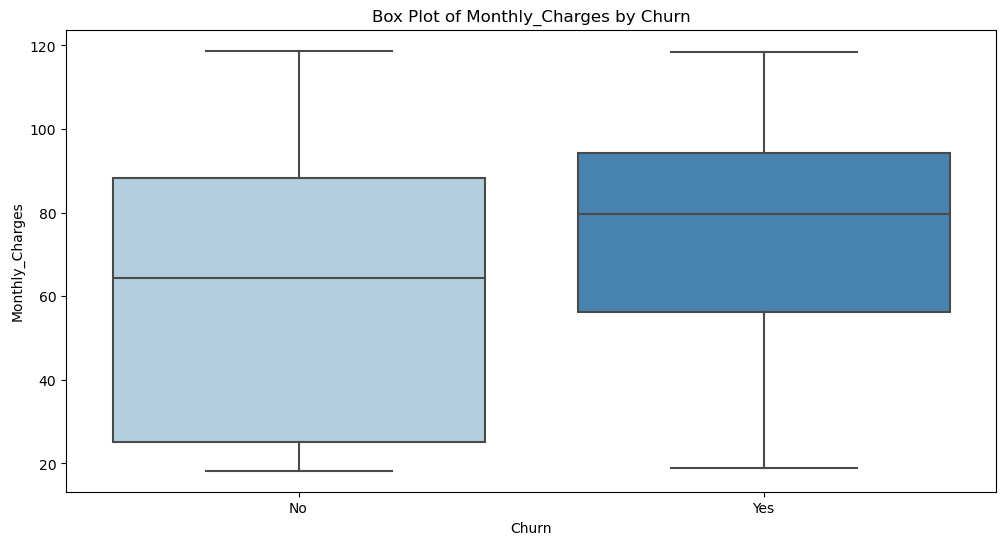

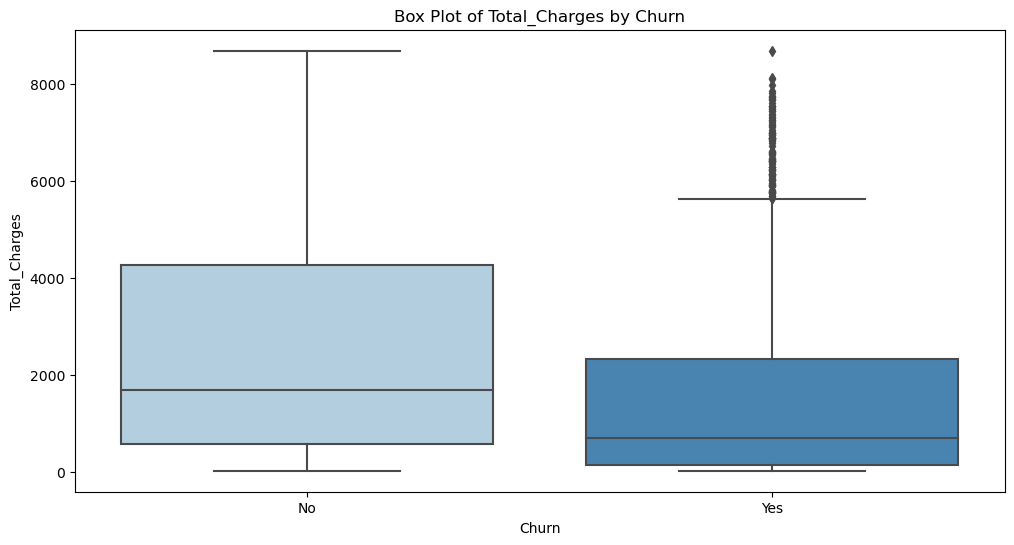

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_by_numerical_features(df, churn_col, numerical_cols):

    # Loop through each numerical column and plot the box plot
    for num_col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=churn_col, y=num_col, data=df, palette='Blues')
        plt.title(f'Box Plot of {num_col} by Churn')
        plt.xlabel('Churn')
        plt.ylabel(num_col)
        plt.xticks(rotation=0)
        plt.show()

plot_churn_by_numerical_features(df, 'Churn', numerical)


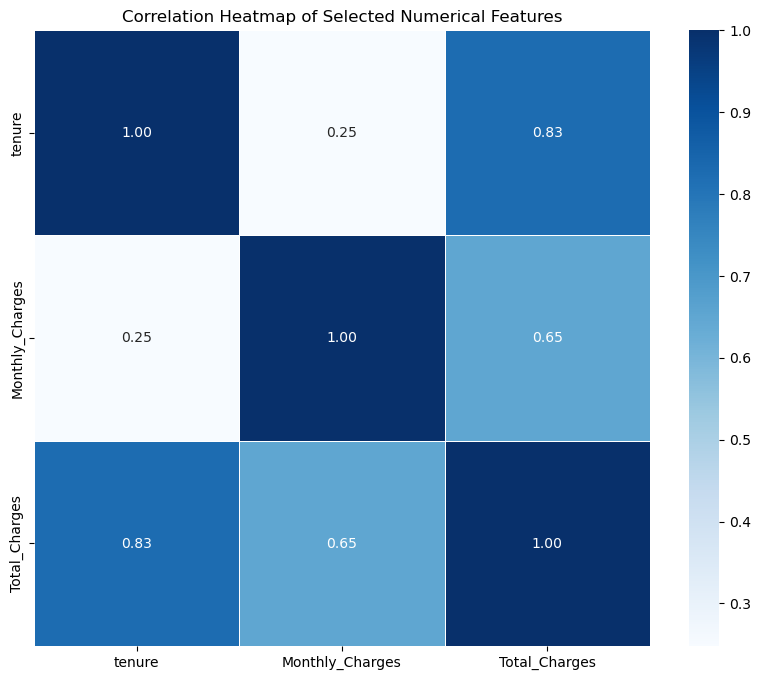

In [159]:
def plot_correlation_heatmap(df, numerical_features):
    # Select only the columns from the provided list of numerical features
    numerical_df = df[numerical_features]
    
    # Calculate the correlation matrix
    corr = numerical_df.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=True, linewidths=.5)
    
    plt.title('Correlation Heatmap of Selected Numerical Features')
    plt.show()

# Example usage
plot_correlation_heatmap(df, numerical)


There is strong correlation between tenure and total charges.

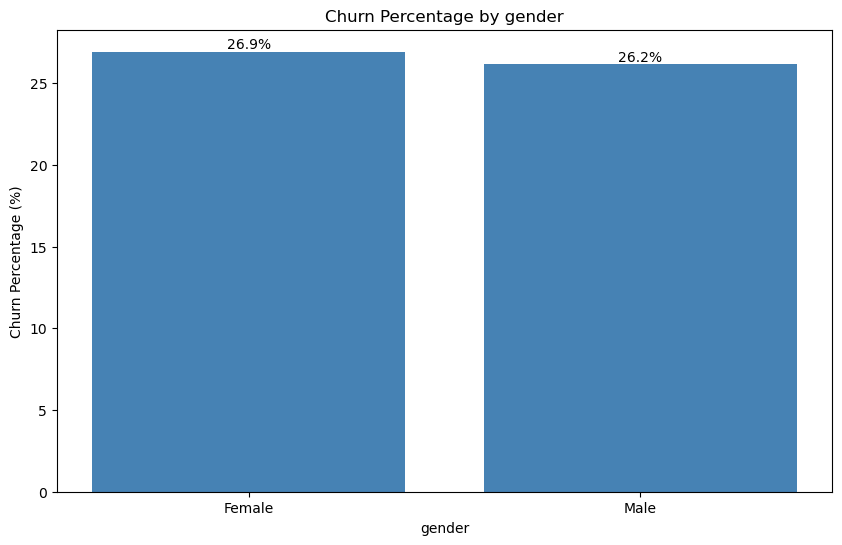

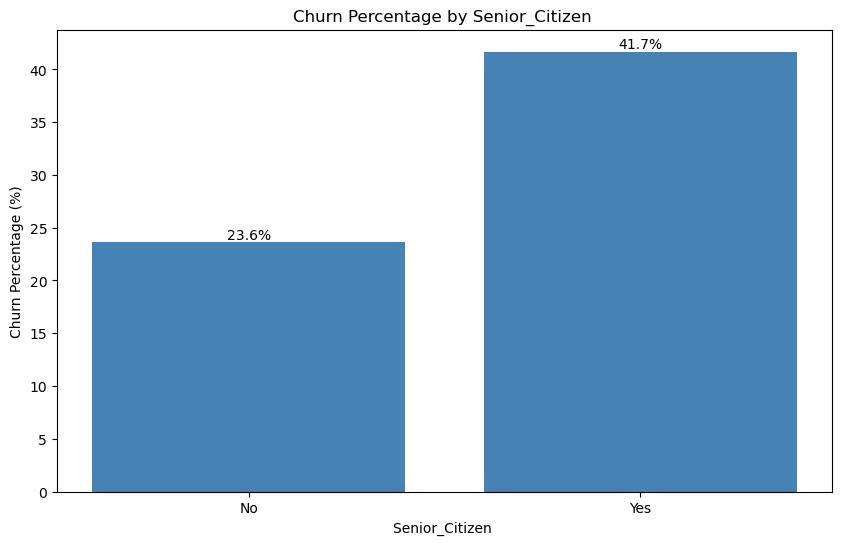

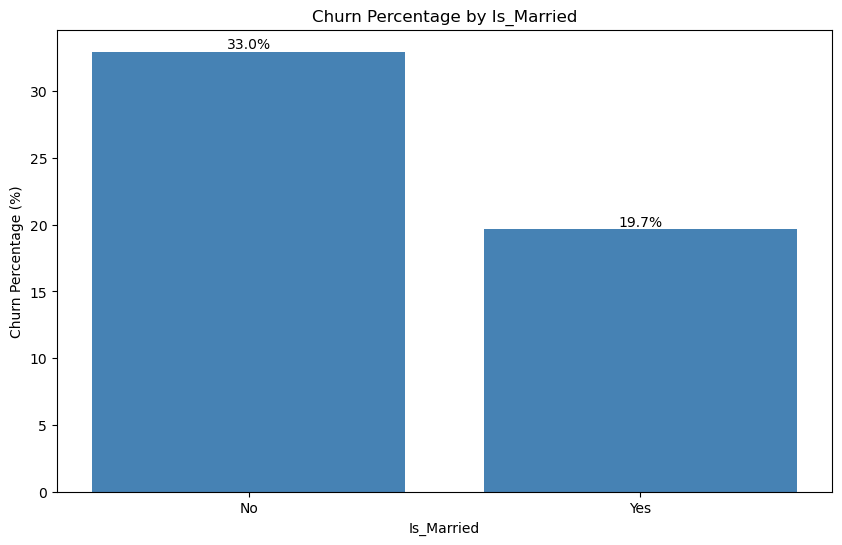

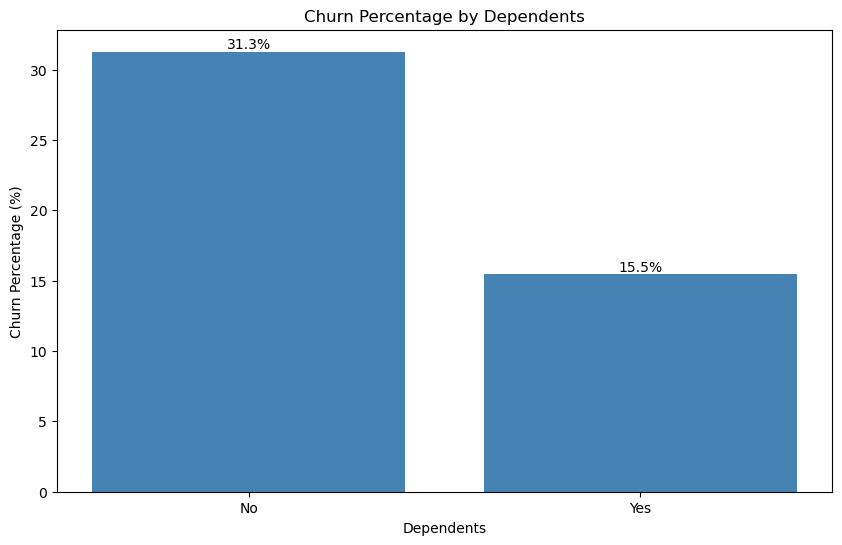

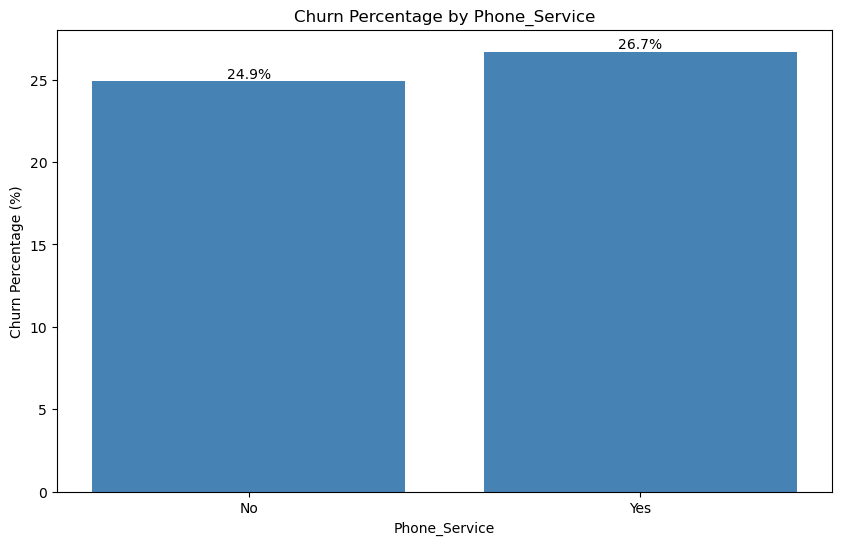

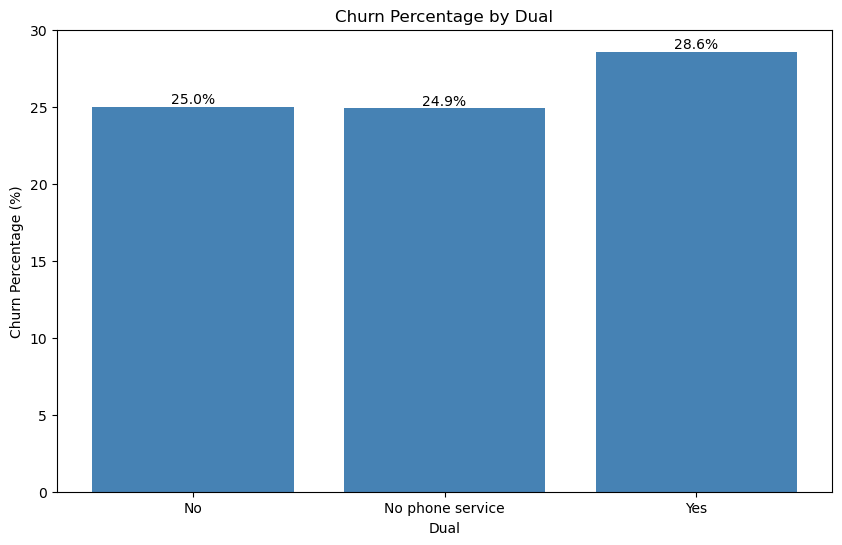

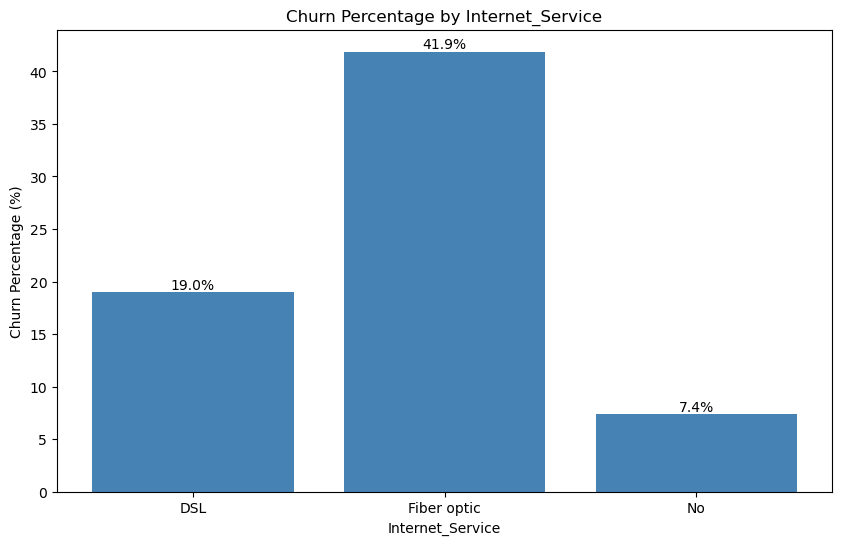

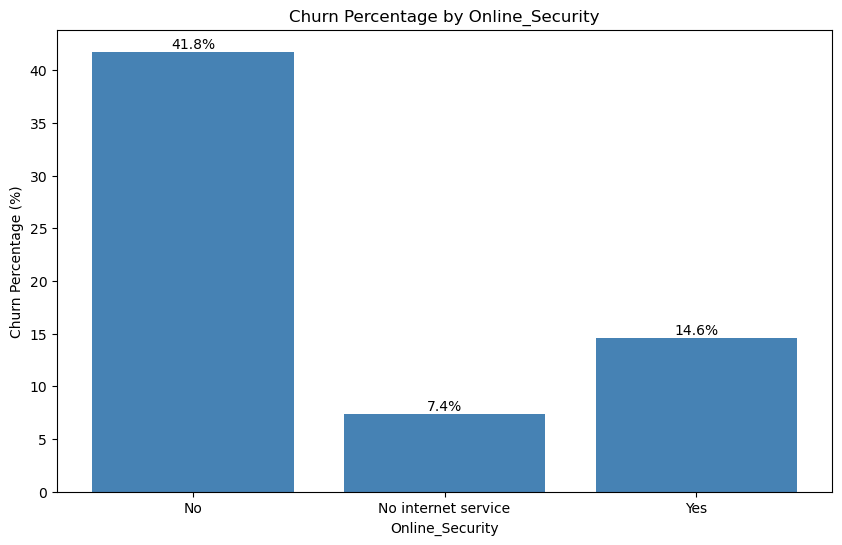

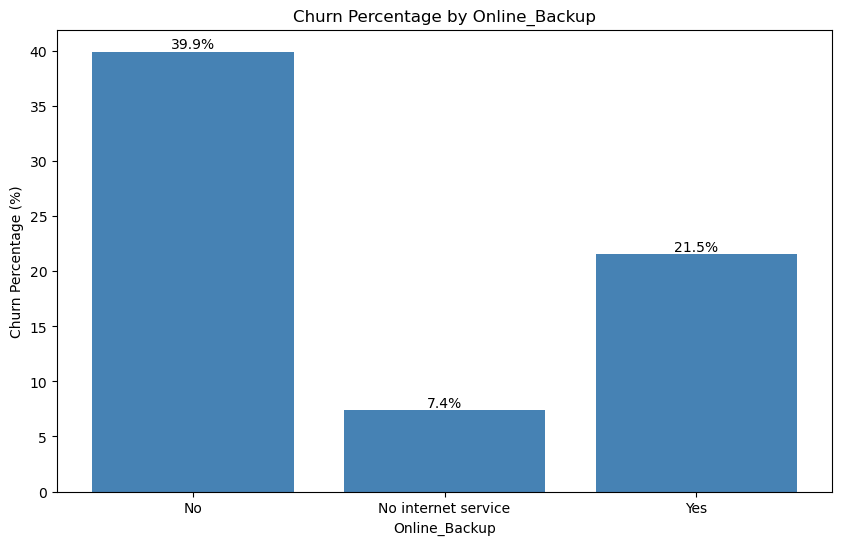

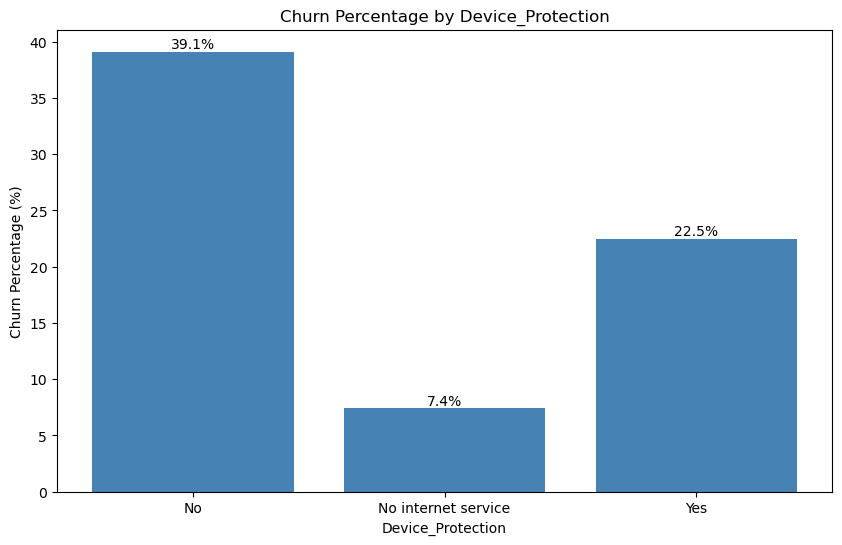

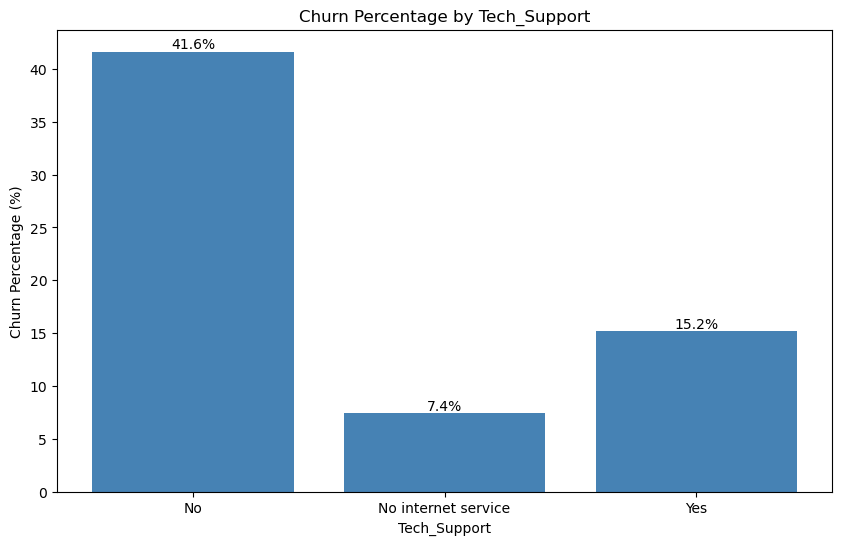

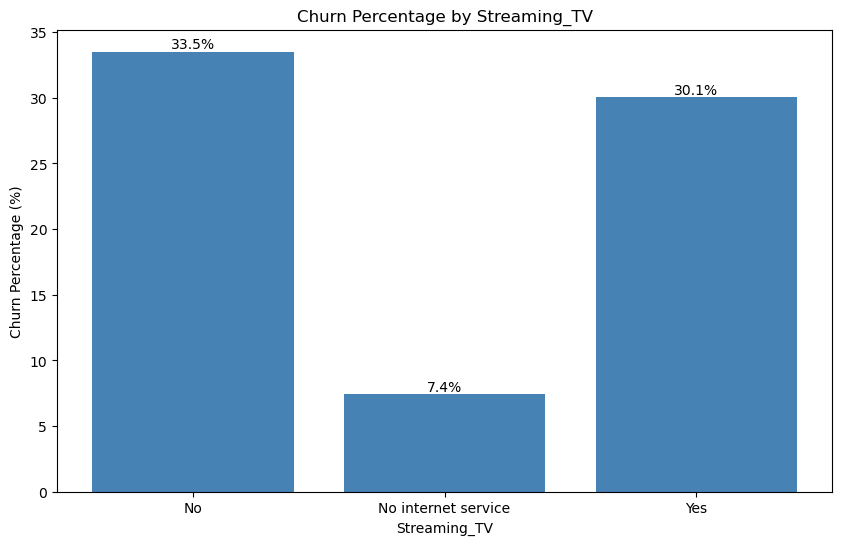

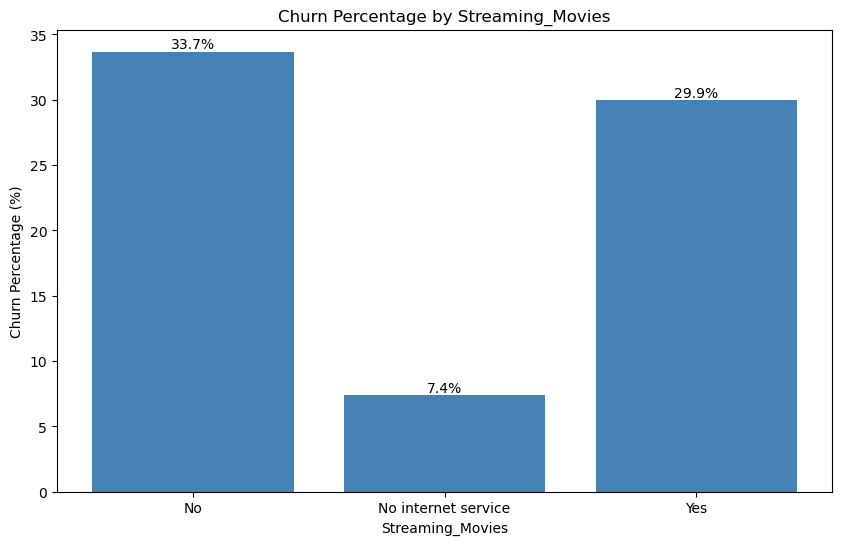

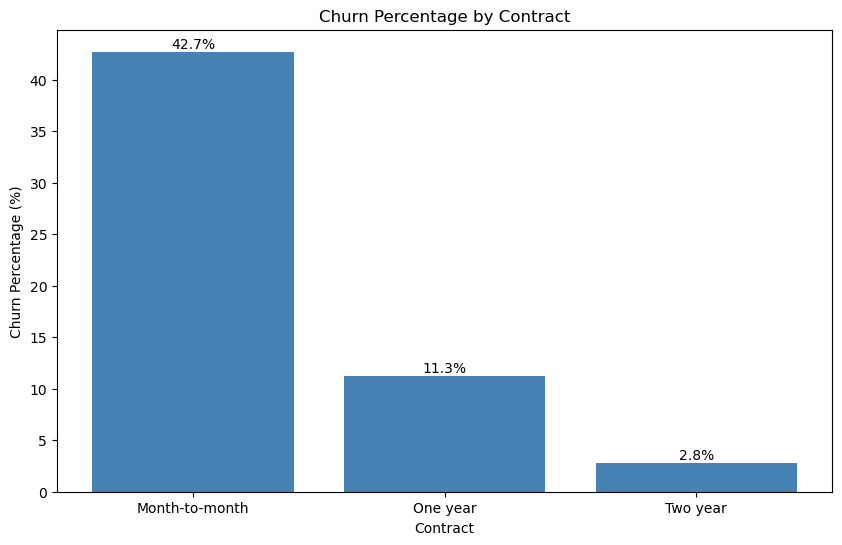

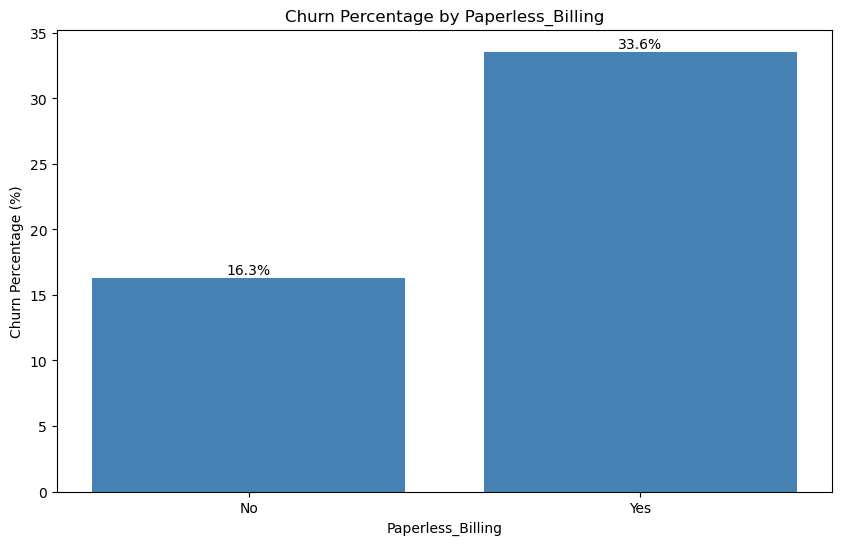

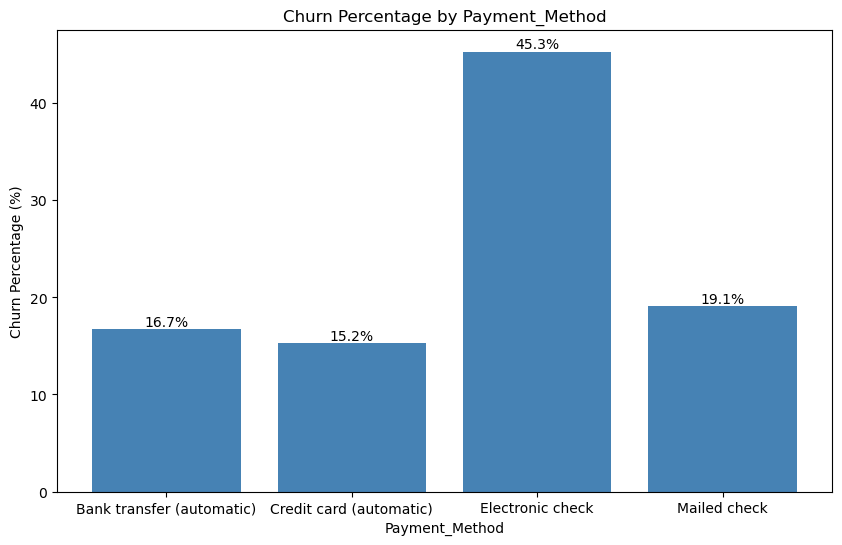

In [171]:
def plot_churn_by_categories(df, churn_col, categorical_cols):

    # Loop through each categorical column and plot the churn percentage
    for category_col in categorical_cols:
        # Calculate churn percentage per category
        churn_percentage = df.groupby(category_col)[churn_col].value_counts(normalize=True).unstack() * 100

        # Plot the churn percentages
        plt.figure(figsize=(10, 6))
        bars = plt.bar(churn_percentage.index, churn_percentage['Yes'], color='steelblue')
        
        # Add labels on the bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')
        
        plt.title(f'Churn Percentage by {category_col}')
        plt.xlabel(category_col)
        plt.ylabel('Churn Percentage (%)')
        plt.xticks(rotation=0)
        plt.show()

plot_churn_by_categories(df, 'Churn', categorical[:-1])


Senior level ,single and have no dependents customers are more likely to churn 

# Feature Selection

In [237]:
def perform_ttest(df, target_col, numerical_cols):
    
    results = {}
    
    # Get unique categories for the target column
    categories = df[target_col].cat.categories
    
    for num_col in numerical_cols:
        pairwise_results = []
        
        for i in range(len(categories)):
            for j in range(i + 1, len(categories)):
                # Filter data for the two categories
                data_i = df[df[target_col] == categories[i]][num_col].dropna()
                data_j = df[df[target_col] == categories[j]][num_col].dropna()
                
                if len(data_i) > 0 and len(data_j) > 0:
                    # Perform T-test
                    t_stat, p_value = stats.ttest_ind(data_i, data_j, equal_var=False)  # Welch's T-test
                    
                    pairwise_results.append({
                        'Comparison': f"{categories[i]} vs {categories[j]}",
                        'Feature': num_col,
                        'T-statistic': t_stat,
                        'p-value': p_value
                    })
        
        # Store results
        results[num_col] = pd.DataFrame(pairwise_results)
    
    return results

target_column = 'Churn'
numerical_columns = numerical  # Replace with your actual numerical column names
results = perform_ttest(df, target_column, numerical_columns)

confidence_level = 0.05

# Print results
insignificant = []

for col, result_df in results.items():
#     print(result_df['p-value'].values)
    if result_df['p-value'].values > confidence_level:
        insignificant.append(col)
if len(insignificant) == 0:
    print("All have differences")
else:
    print(f"There is no difference between {insignificant} on {target_column}")

All has difference


In [238]:
def perform_chi2_and_posthoc(df, target_col, categorical_cols):

    results = {}
    
    for cat_col in categorical_cols:
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_col], df[target_col])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        
        results[cat_col] = {
            'chi2': {
                'Chi2-statistic': chi2_stat,
                'p-value': p_value,
                'Degrees of Freedom': dof,
                'Expected Frequencies': expected
            }
        }
        
    return results

target_column = 'Churn'
categorical_columns = categorical[:-1]  # Replace with your actual categorical column names
results = perform_chi2_and_posthoc(df, target_column, categorical_columns)

confidence_level = 0.05

# Print results
insignificant = []
for col, result in results.items():
    if result['chi2']['p-value'] > confidence_level:
        insignificant.append(col)
        
if len(insignificant) == 0:
    print("All has difference")
else:
    print(f"There is no difference between {insignificant} on {target_column}")

There is no difference between ['gender', 'Phone_Service'] on Churn


We can exclude gender and phone service from analysis

In [376]:
df=df.drop(['gender','Phone_Service'], axis=1)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior_Citizen     7043 non-null   object 
 1   Is_Married         7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   tenure             7043 non-null   float64
 4   Dual               7043 non-null   object 
 5   Internet_Service   7043 non-null   object 
 6   Online_Security    7043 non-null   object 
 7   Online_Backup      7043 non-null   object 
 8   Device_Protection  7043 non-null   object 
 9   Tech_Support       7043 non-null   object 
 10  Streaming_TV       7043 non-null   object 
 11  Streaming_Movies   7043 non-null   object 
 12  Contract           7043 non-null   object 
 13  Paperless_Billing  7043 non-null   object 
 14  Payment_Method     7043 non-null   object 
 15  Monthly_Charges    7043 non-null   float64
 16  Total_Charges      7032 

# Modeling and Results

In [402]:
accuracy= []
recall =[]
roc_auc= []
precision = []

model_names =[]

X= df.drop('Churn', axis=1)
y= df['Churn']

categorical_features_indices = np.where((X.dtypes != float) & (X.dtypes != int))[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_base = CatBoostClassifier(verbose=False,random_state=0)

catboost_base.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_base.predict(X_test)
y_pred_proba = catboost_base.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class ('Yes')

In [403]:
# Initialize lists for metrics
accuracy = []
recall = []
precision = []
f1 = [] 

# Calculate metrics
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
recall.append(round(recall_score(y_test, y_pred, pos_label='Yes'), 4))
precision.append(round(precision_score(y_test, y_pred, pos_label='Yes'), 4))
f1.append(round(f1_score(y_test, y_pred, pos_label='Yes'), 4))  

model_names = ['Catboost_default']
result_df = pd.DataFrame({'Accuracy': accuracy, 
                          'Recall': recall, 
                          'Precision': precision,
                          'F1_Score': f1}, 
                         index=model_names)

result_df


,Accuracy,Recall,Precision,F1_Score
Catboost_default,0.8088,0.5261,0.6959,0.5992


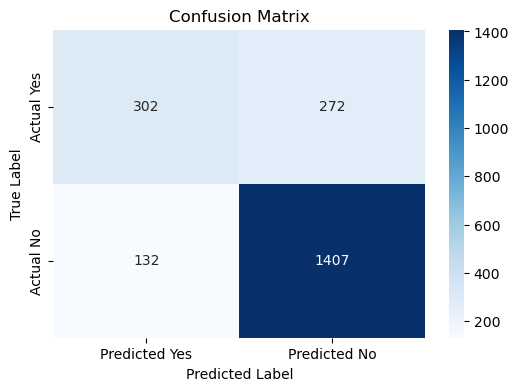

In [391]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['Actual Yes', 'Actual No'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


* For better recall results and imbalance handeling

In [404]:
accuracy= []
recall =[]
roc_auc= []
precision = []

model_names =[]

X= df.drop('Churn', axis=1)
y= df['Churn']

categorical_features_indices = np.where((X.dtypes != float) & (X.dtypes != int))[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_pos3 = CatBoostClassifier(verbose=False,random_state=0, scale_pos_weight=3) #scale_pos_weight for imbalance handeling

catboost_pos3.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_pos3.predict(X_test)
y_pred_proba = catboost_pos3.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class ('Yes')

In [405]:
# Initialize lists for metrics
accuracy = []
recall = []
precision = []
f1 = [] 

# Calculate metrics
accuracy.append(round(accuracy_score(y_test, y_pred), 4))
recall.append(round(recall_score(y_test, y_pred, pos_label='Yes'), 4))
precision.append(round(precision_score(y_test, y_pred, pos_label='Yes'), 4))
f1.append(round(f1_score(y_test, y_pred, pos_label='Yes'), 4))  

model_names = ['Catboost_default']
result_df = pd.DataFrame({'Accuracy': accuracy, 
                          'Recall': recall, 
                          'Precision': precision,
                          'F1_Score': f1}, 
                         index=model_names)

result_df


,Accuracy,Recall,Precision,F1_Score
Catboost_default,0.744,0.8554,0.5174,0.6448


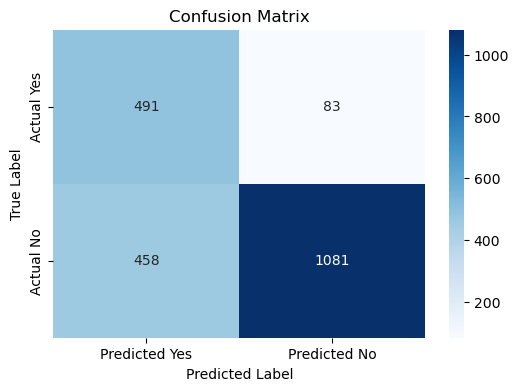

In [394]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['Actual Yes', 'Actual No'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


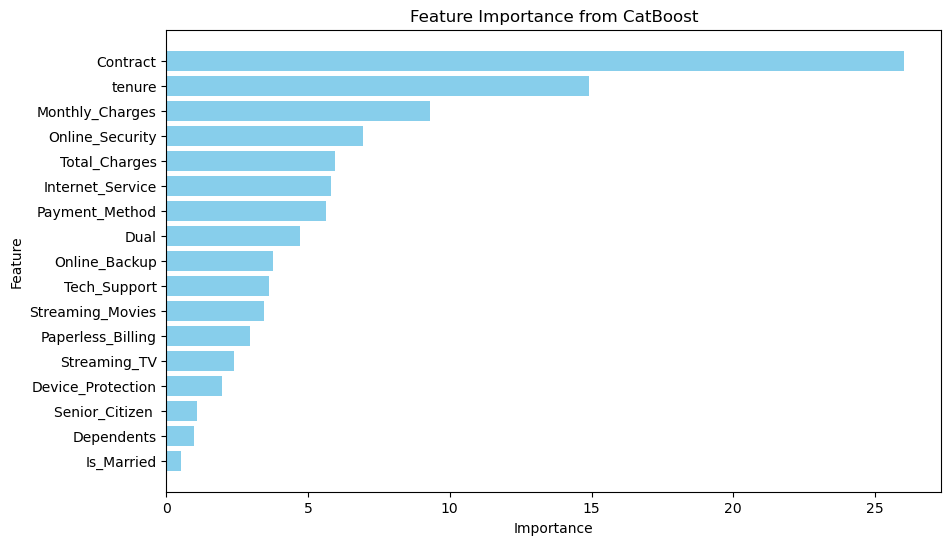

In [395]:
# Get feature importance from the trained CatBoost model
feature_importance = catboost_pos3.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


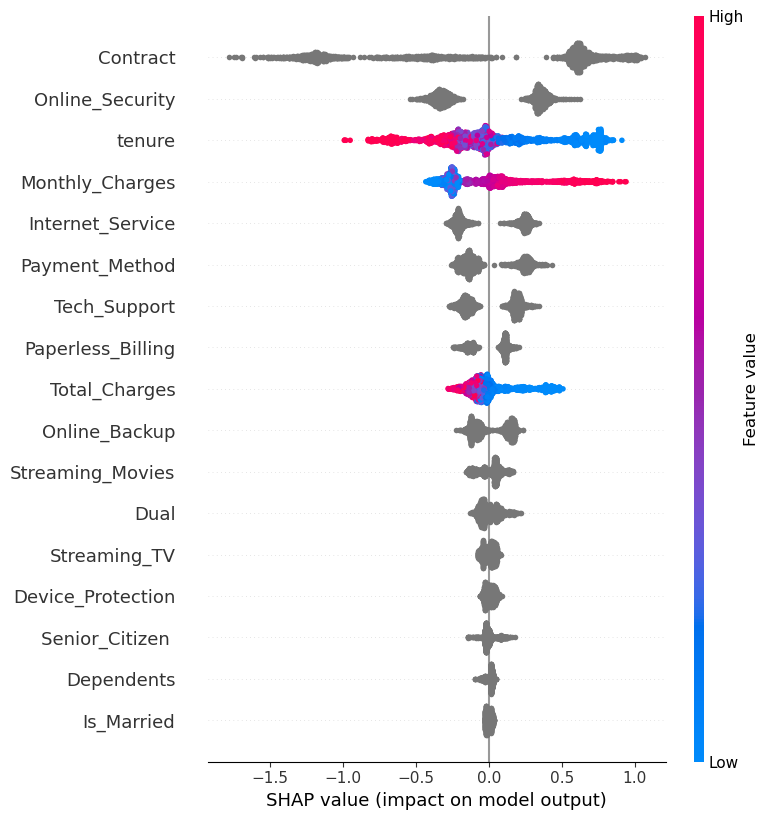

In [401]:
# Create a TreeExplainer object for the CatBoost model
explainer = shap.TreeExplainer(catboost_pos3)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for individual features
shap.summary_plot(shap_values, X_test)

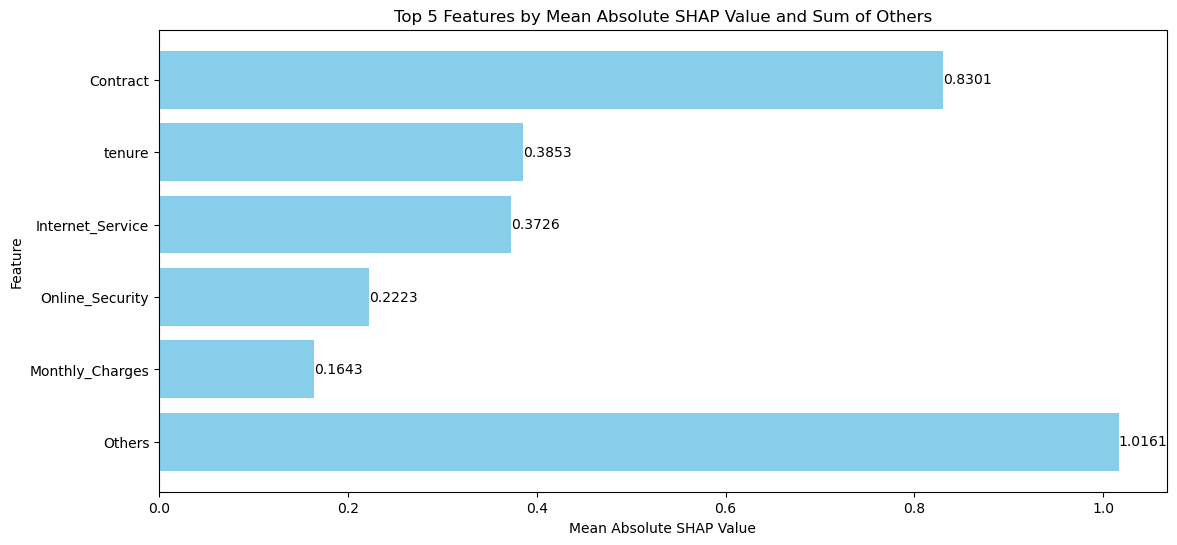

In [400]:
# Identify top 5 features and the sum of others
top_5_features = shap_importance.head(5)
sum_others = shap_importance.iloc[5:]['Mean Absolute SHAP Value'].sum()

# Create a DataFrame for the sum of others
others_df = pd.DataFrame({
    'Feature': ['Others'],
    'Mean Absolute SHAP Value': [sum_others]
})

# Concatenate top 5 features with the sum of others
top_5_features_with_others = pd.concat([top_5_features, others_df], ignore_index=True)

# Plot the bar chart
plt.figure(figsize=(13, 6))
bars = plt.barh(top_5_features_with_others['Feature'], top_5_features_with_others['Mean Absolute SHAP Value'], color='skyblue')

# Add values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Top 5 Features by Mean Absolute SHAP Value and Sum of Others')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()


# save Model 

In [344]:
import joblib

# Save the trained model to a file
joblib.dump(catboost_base, 'catboost_model.pkl')

['catboost_model.pkl']